In [1]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import models

In [5]:
from src.CAMs import XGradCAM, GradCAMPlusPlus
from src.utils import find_bounding_boxes_per_class

# Saliency Map Extraction

## XGrad-CAM

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

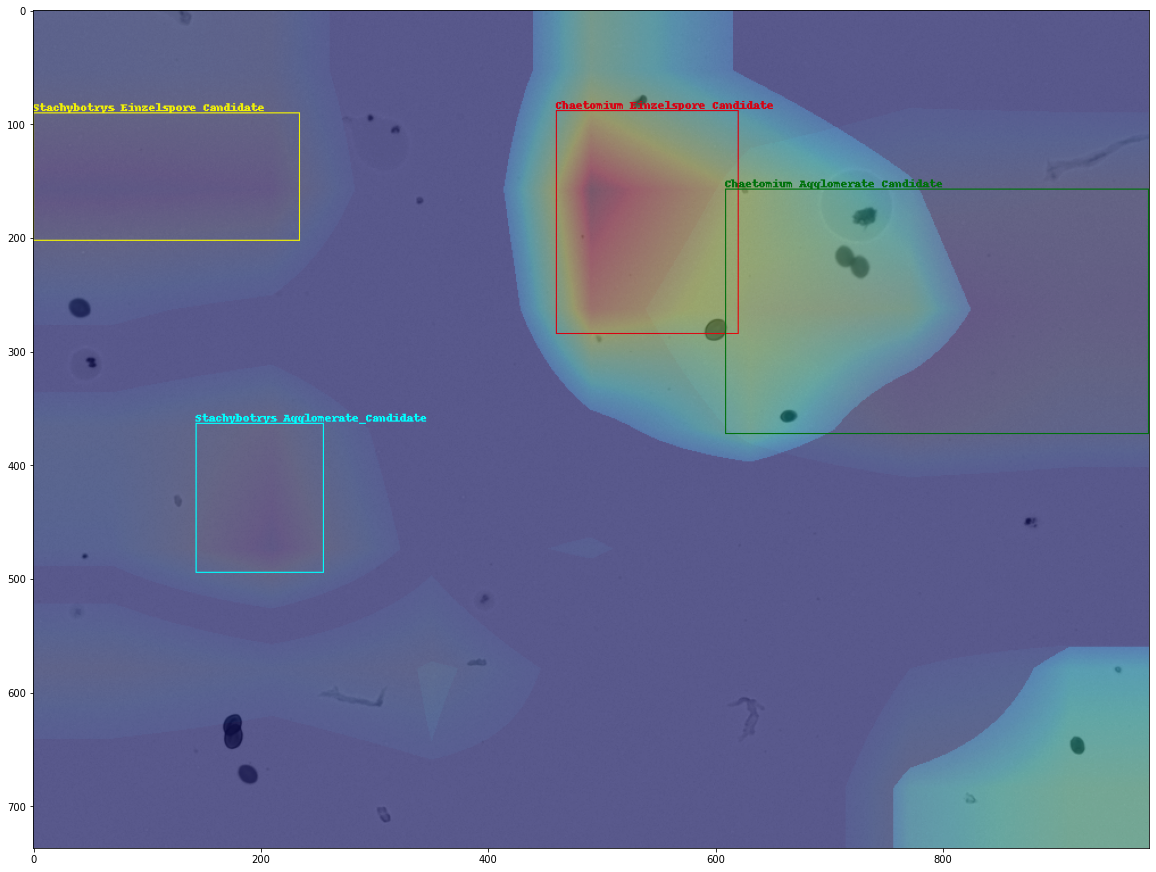

In [6]:
resnet50 = models.resnet50(pretrained=True)

num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 4)
resnet50 = resnet50.cuda()

PATH = "/content/X-Detector/data/resnet50.pth"
checkpoint = torch.load(PATH)
resnet50.load_state_dict(checkpoint)
resnet50 = resnet50.cuda()

a = XGradCAM(resnet50, resnet50.layer4, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()),True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

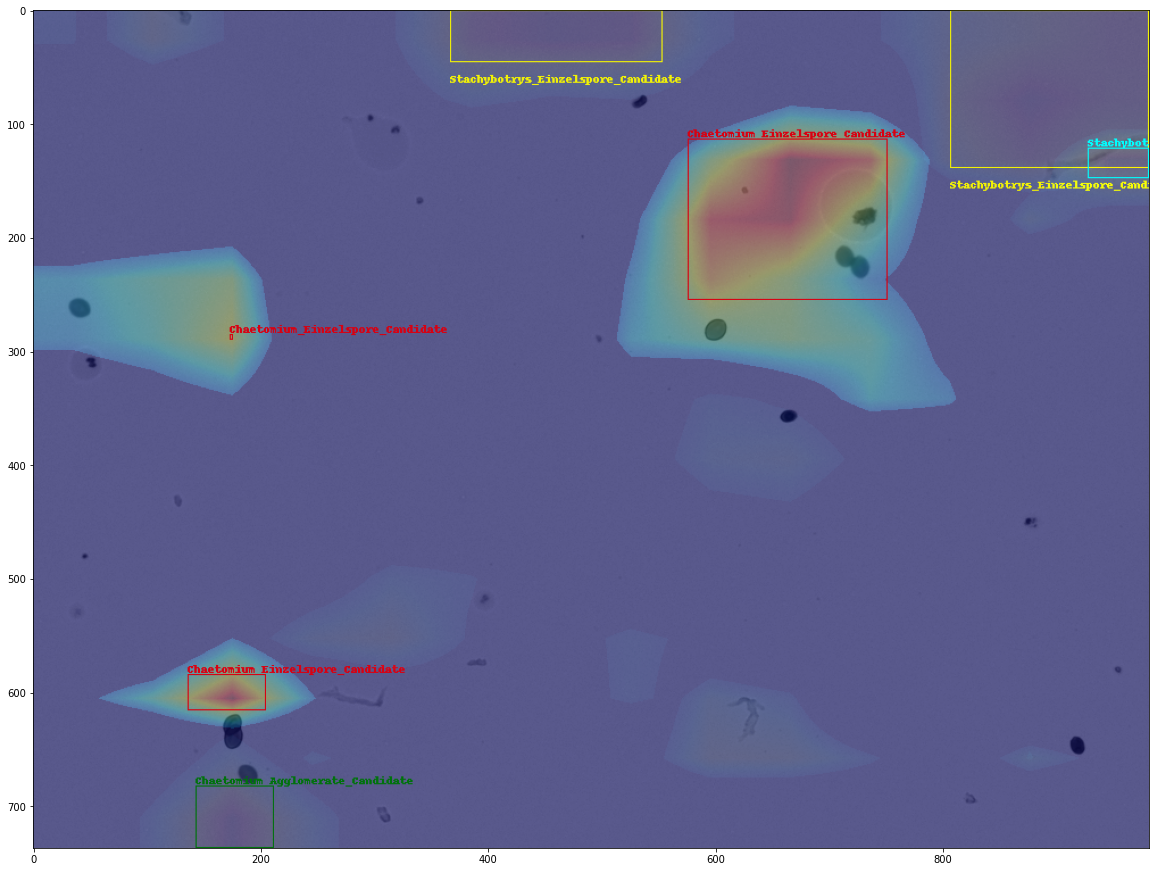

In [13]:
vgg16 = models.vgg16(pretrained=True)

num_ftrs = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = nn.Linear(num_ftrs,4)
vgg16 = vgg16.cuda()

PATH = "/content/X-Detector/data/vgg16.pth"
checkpoint = torch.load(PATH)
vgg16.load_state_dict(checkpoint)
vgg16 = vgg16.cuda()

a = XGradCAM(vgg16, vgg16.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

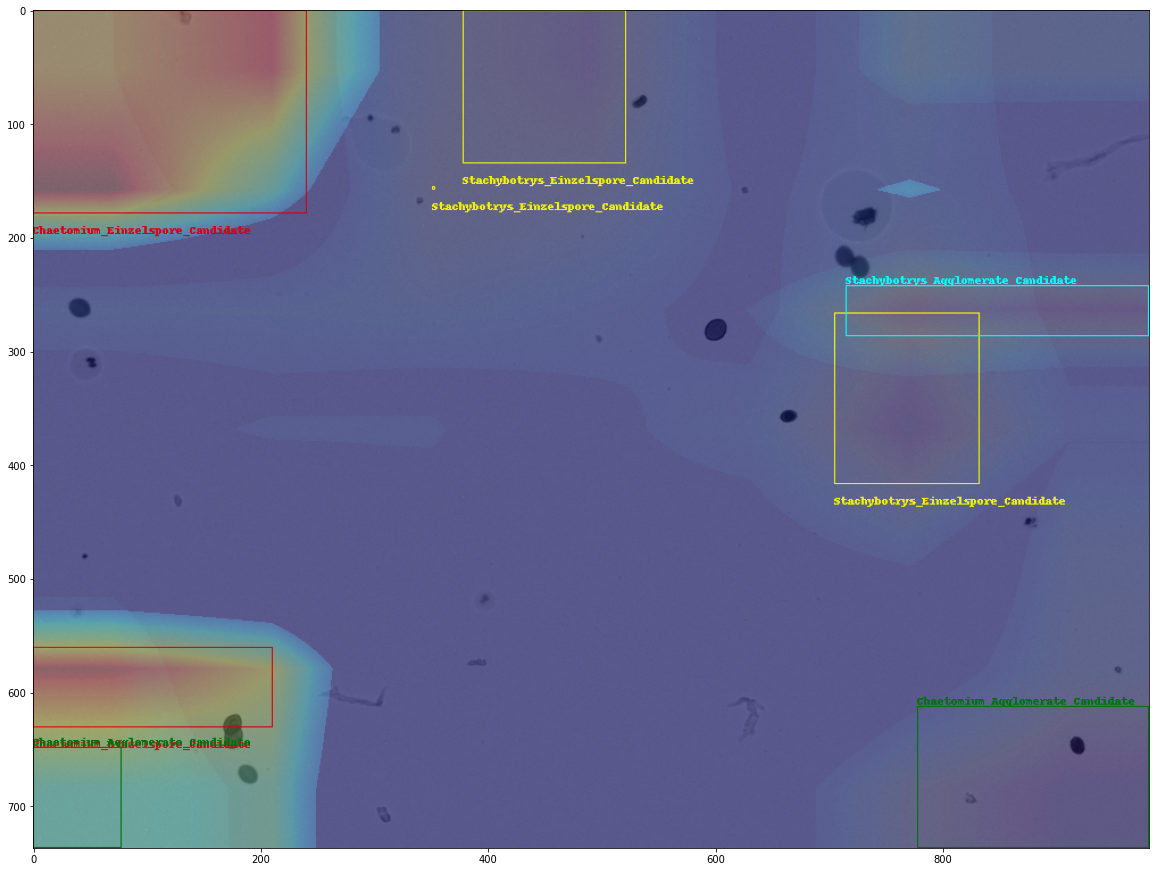

In [14]:
densenet169 = models.densenet169(pretrained=True)

num_ftrs = densenet169.classifier.in_features
densenet169.classifier = nn.Linear(num_ftrs,4)
densenet169 = densenet169.cuda()

PATH = "/content/X-Detector/data/densenet169.pth"
checkpoint = torch.load(PATH)
densenet169.load_state_dict(checkpoint)
densenet169 = densenet169.cuda()

a = XGradCAM(densenet169, densenet169.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

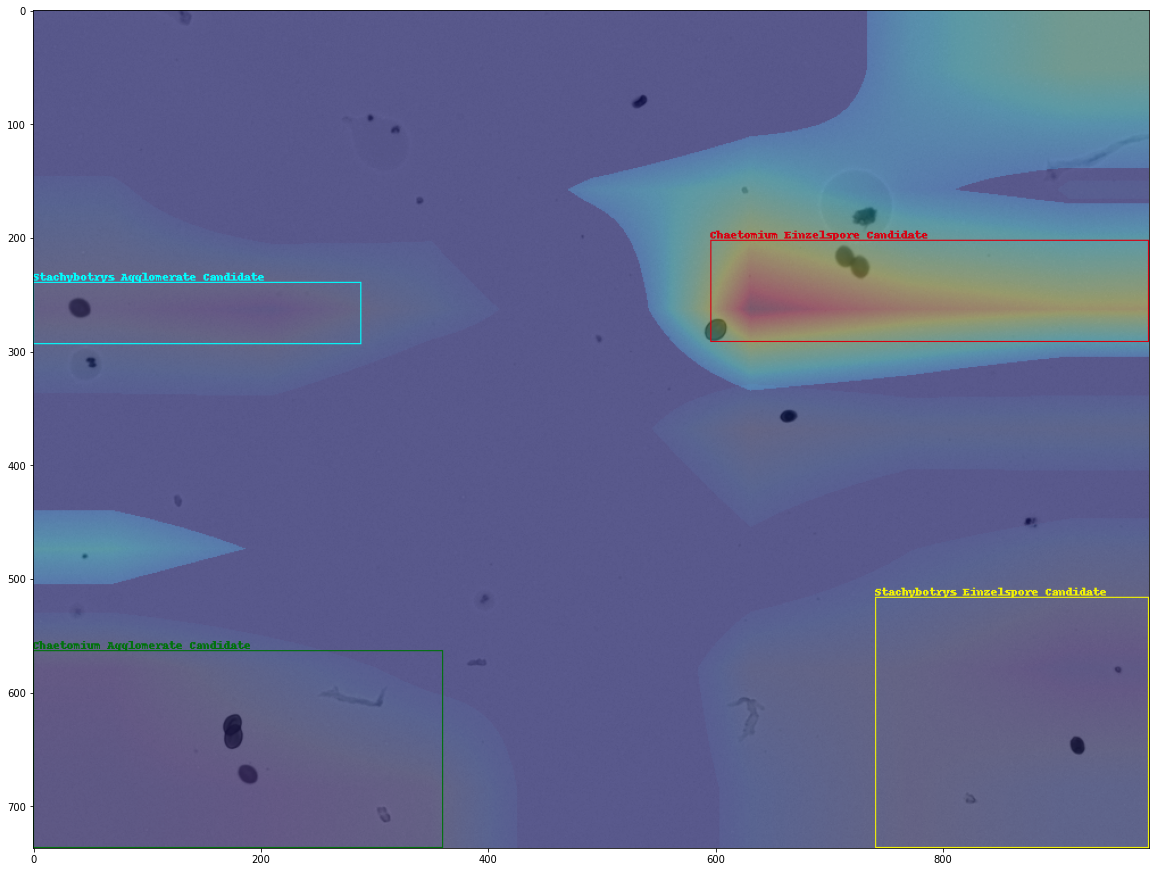

In [16]:
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

num_ftrs = mobilenet_v2.classifier[1].in_features
mobilenet_v2.classifier[1] = nn.Linear(num_ftrs,4)

PATH = "/content/X-Detector/data/mobileNetv2.pth"
checkpoint = torch.load(PATH)
mobilenet_v2.load_state_dict(checkpoint)
mobilenet_v2 = mobilenet_v2.cuda()

a = XGradCAM(mobilenet_v2, mobilenet_v2.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

## Grad-CAM++

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

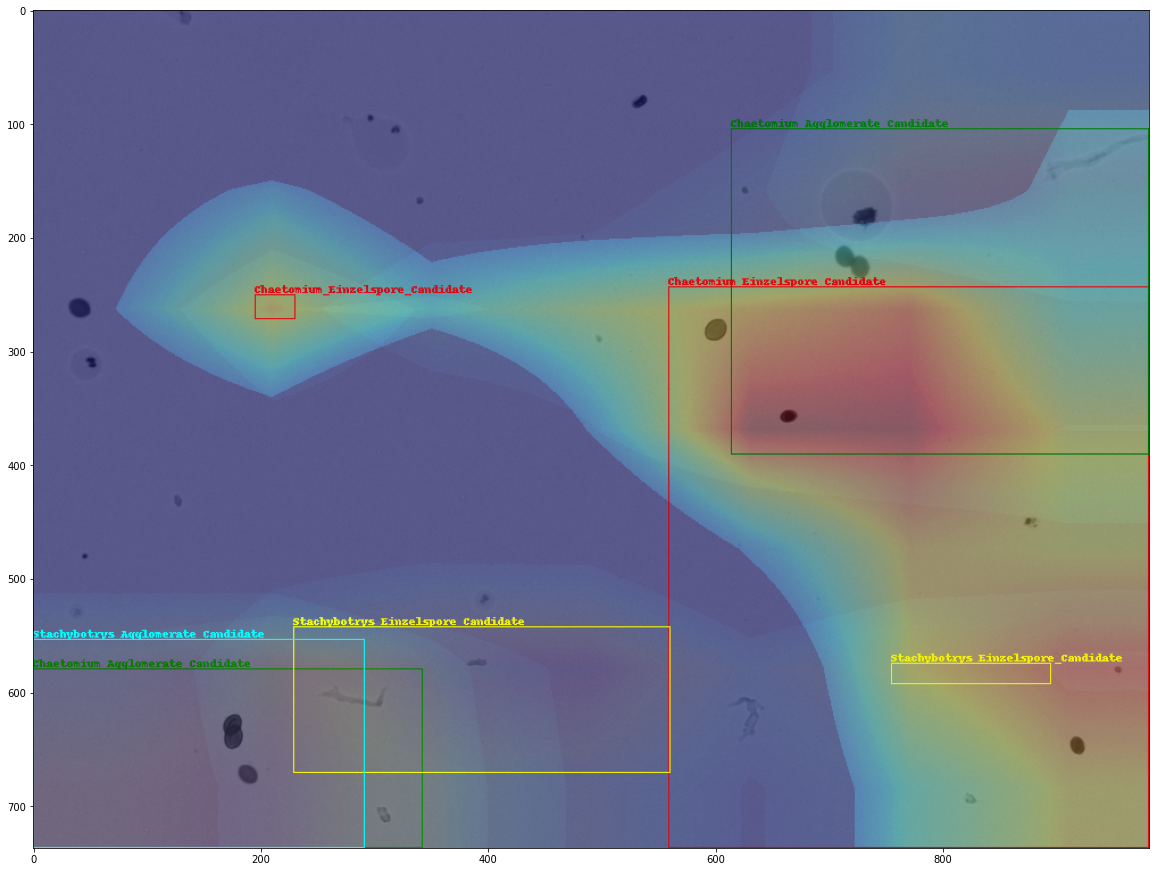

In [17]:
resnet50 = models.resnet50(pretrained=True)

num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 4)
resnet50 = resnet50.cuda()

PATH = "/content/X-Detector/data/resnet50.pth"
checkpoint = torch.load(PATH)
resnet50.load_state_dict(checkpoint)
resnet50 = resnet50.cuda()

a =  GradCAMPlusPlus(resnet50, resnet50.layer4, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

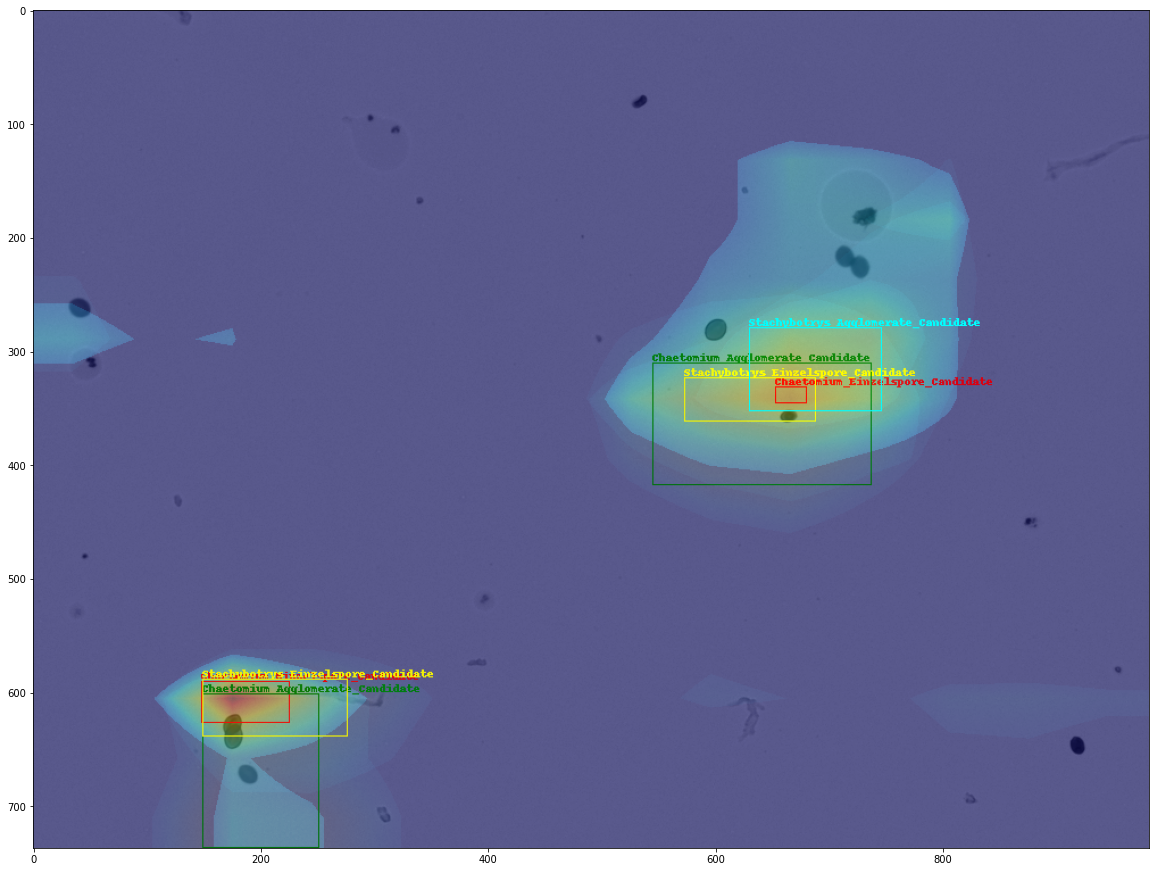

In [18]:
vgg16 = models.vgg16(pretrained=True)

num_ftrs = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = nn.Linear(num_ftrs,4)
vgg16 = vgg16.cuda()

PATH = "/content/X-Detector/data/vgg16.pth"
checkpoint = torch.load(PATH)
vgg16.load_state_dict(checkpoint)
vgg16 = vgg16.cuda()

a = GradCAMPlusPlus(vgg16, vgg16.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

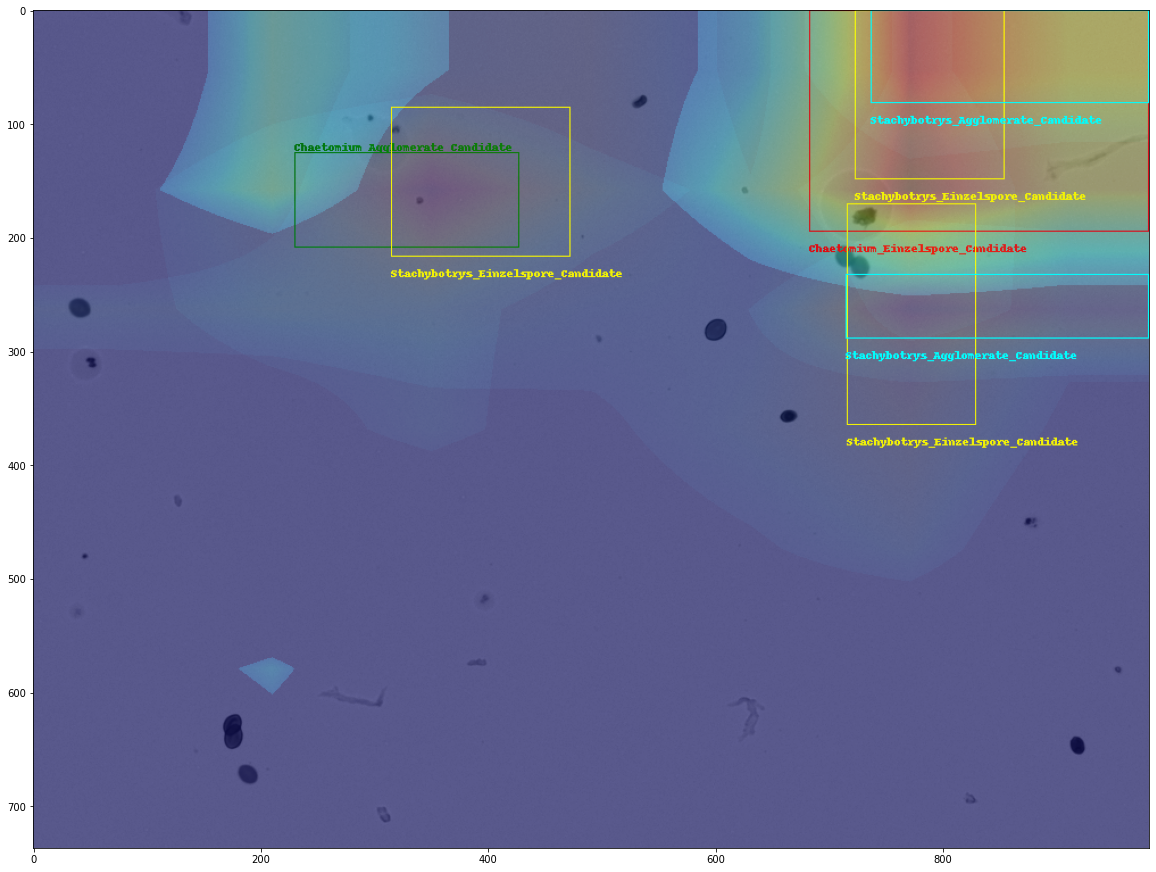

In [19]:
densenet169 = models.densenet169(pretrained=True)

num_ftrs = densenet169.classifier.in_features
densenet169.classifier = nn.Linear(num_ftrs,4)
densenet169 = densenet169.cuda()

PATH = "/content/X-Detector/data/densenet169.pth"
checkpoint = torch.load(PATH)
densenet169.load_state_dict(checkpoint)
densenet169 = densenet169.cuda()

a = GradCAMPlusPlus(densenet169, densenet169.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)

/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,224),dtype=torch.float),False,strToLabel[class_oi])
/content/X-Detector/src/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ex, out = CAM_explainer(torch.tensor(img_norm.reshape(1,3,224,22

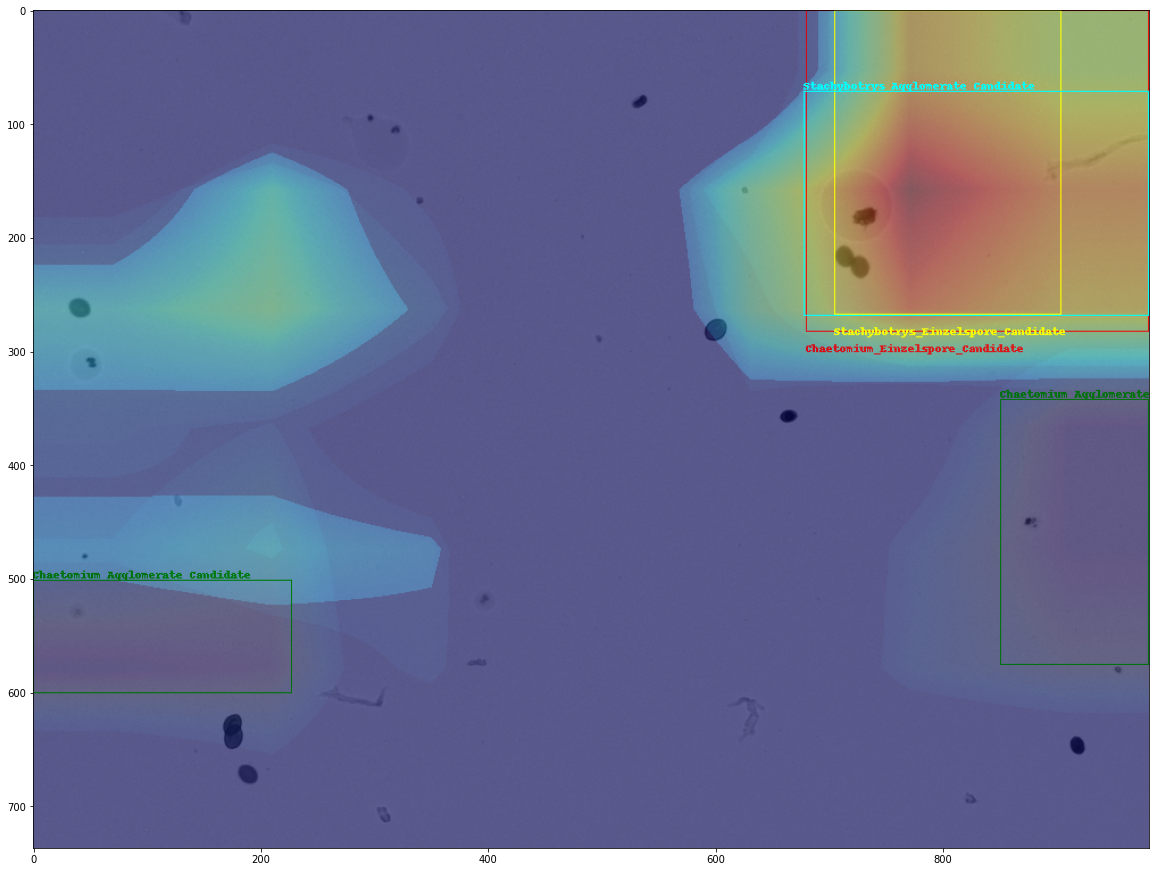

In [20]:
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

num_ftrs = mobilenet_v2.classifier[1].in_features
mobilenet_v2.classifier[1] = nn.Linear(num_ftrs,4)

PATH = "/content/X-Detector/data/mobileNetv2.pth"
checkpoint = torch.load(PATH)
mobilenet_v2.load_state_dict(checkpoint)
mobilenet_v2 = mobilenet_v2.cuda()

a = GradCAMPlusPlus(mobilenet_v2, mobilenet_v2.features, True)
strToLabel = {'Chaetomium_Einzelspore_Candidate': 0,'Chaetomium_Agglomerate_Candidate': 1,'Stachybotrys_Einzelspore_Candidate': 2,'Stachybotrys_Agglomerate_Candidate': 3}
strToColor = {'Chaetomium_Einzelspore_Candidate': 'red','Chaetomium_Agglomerate_Candidate': 'green','Stachybotrys_Einzelspore_Candidate': 'yellow','Stachybotrys_Agglomerate_Candidate': 'cyan'}

class_boxes = find_bounding_boxes_per_class(a, '/content/drive/My Drive/CV_Proj/CV21_AnnotatedDataset/img_0011.bmp', list(strToLabel.keys()),list(strToLabel.values()),list(strToColor.values()), True)